# Network Analysis of Publications on Studies of Parkinson Disease

In [1]:
import pandas as pd
import ast
from ast import literal_eval
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib import rcParams
warnings.filterwarnings('ignore')

In [2]:
def read_data(path, sep):
    df = pd.read_csv(path, sep=sep)
    df.loc[:, 'AA'] = df['AA'].apply(lambda x: ast.literal_eval(x))
    df.loc[:, 'W'] = df['W'].apply(lambda x: ast.literal_eval(x))
    return df

In [3]:
data = read_data('filtered_data.csv', sep = ';')

In [4]:
net = pd.read_csv('excluded_net.csv', sep = ';')

In [5]:
net

,ID1,ID2,weight,Y
0,2754967293,2339791932,1,2017
1,2112455323,1920030402,1,2015
2,2177834950,2123627348,1,2015
3,2558041282,1934236512,1,2016
4,2558041282,1947901277,1,2016
...,...,...,...,...
310824,2895767795,1967224666,1,2019
310825,2895767795,2274550138,1,2019
310826,2895767795,2617488731,1,2019
310827,2619593042,2545724250,1,2017


## Journal analysis

In [67]:
journals_data = data[['Id', 'J', 'Y']].copy().rename(columns = {'Y':'Year'})
journals_data.dropna(subset = ['J'], inplace = True, axis = 0)
journals_data['J'] =  journals_data['J'].apply(lambda x: ast.literal_eval(x))
journals_data.loc[:, 'JId'] = journals_data['J'].apply(lambda x: x['JId'])
journals_data.loc[:, 'JN'] = journals_data['J'].apply(lambda x: x['JN'])

In [68]:
journals_data

,Id,J,Year,JId,JN
0,2754967293,"{'JN': 'lancet neurology', 'JId': 70053155}",2017,70053155,lancet neurology
1,2112455323,"{'JN': 'movement disorders', 'JId': 163027424}",2015,163027424,movement disorders
2,2177834950,{'JN': 'scandinavian journal of medicine & sci...,2015,199863227,scandinavian journal of medicine & science in ...
3,2558041282,"{'JN': 'cell', 'JId': 110447773}",2016,110447773,cell
4,2901519529,"{'JN': 'lancet neurology', 'JId': 70053155}",2018,70053155,lancet neurology
...,...,...,...,...,...
39806,2547599175,{'JN': 'british journal of neuroscience nursin...,2016,2764522822,british journal of neuroscience nursing
39807,3112561736,{'JN': 'indian journal of physiotherapy and oc...,2020,2764716408,indian journal of physiotherapy and occupation...
39808,2895767795,{'JN': 'revista cientifica de la sociedad espa...,2019,2898111411,revista cientifica de la sociedad espanola de ...
39809,2619593042,"{'JN': 'traditional chinese medicine', 'JId': ...",2017,2764915388,traditional chinese medicine


In [69]:
journals_data[['JId', 'JN']].groupby(by = ['JId', 'JN']).count().to_csv('journals.csv', sep = ';')

In [83]:
pd.DataFrame(journals_data.groupby(by = 'JId').count().rename(columns = {'Id': 'Cnt'})['Cnt']).to_csv('count_journals.csv', sep = ';')
count_journals = pd.read_csv('count_journals.csv', sep = ';')
journals = pd.read_csv('journals.csv', sep = ';')
count_journals = count_journals.merge(journals, how = 'left', on = 'JId')
count_journals.to_csv('count_journals.csv', sep = ';', index = False)

In [88]:
count_journals['Cnt'].describe()

count    3292.000000
mean       12.093256
std        52.105917
min         1.000000
25%         1.000000
50%         2.000000
75%         6.000000
max      1260.000000
Name: Cnt, dtype: float64

In [94]:
count_journals.sort_values(by = 'Cnt', ascending = False).head(20)

,JId,Cnt,JN
1776,147691530,1260,parkinsonism & related disorders
1960,163027424,1201,movement disorders
2587,2734324842,795,biorxiv
3134,2764943606,768,journal of parkinson s disease
2349,196734849,696,scientific reports
1128,96975567,678,frontiers in neurology
2409,202381698,670,plos one
138,10623703,478,international journal of molecular sciences
1364,115201632,456,frontiers in neuroscience
945,79704628,453,neurology


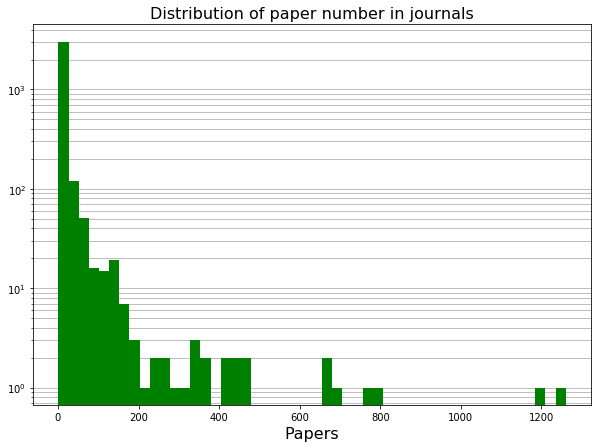

In [87]:
plt.rcParams['figure.figsize'] = 10, 7
plt.title('Distribution of paper number in journals', fontsize = 16)
plt.xlabel('Papers', fontsize = 16)
plt.yscale('log')
plt.grid(axis = 'y', which = 'both', zorder = 0)
plt.hist(count_journals['Cnt'], bins = 50, color = 'green', rwidth = 1, align = 'mid', zorder = 3)
plt.show()

The number of articles in jouranls by years

In [78]:
pd.DataFrame(journals_data.groupby(by = ['JId', 'Year']).count().rename(columns = {'Id': 'Cnt'})['Cnt']).to_csv('journals_years.csv', sep = ';')
journals_years = pd.read_csv('journals_years.csv', sep = ';')
journals = pd.read_csv('journals.csv', sep = ';')
journals_years = journals_years.merge(journals, how = 'left', on = 'JId')
journals_years.to_csv('journals_years.csv', sep = ';', index = False)

In [80]:
journals_years['Cnt'].describe()

count    9037.000000
mean        4.405334
std        12.651780
min         1.000000
25%         1.000000
50%         1.000000
75%         3.000000
max       275.000000
Name: Cnt, dtype: float64

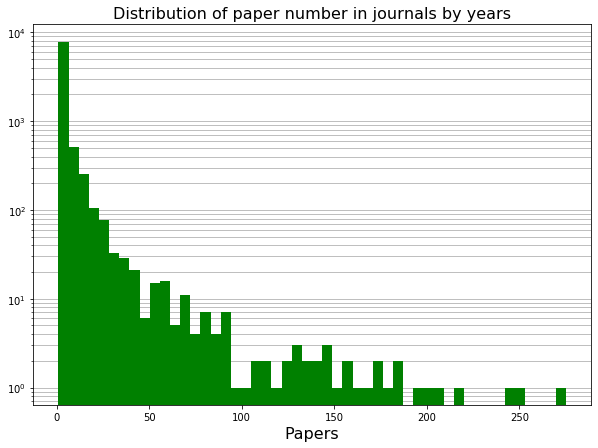

In [85]:
plt.rcParams['figure.figsize'] = 10, 7
plt.title('Distribution of paper number in journals by years', fontsize = 16)
plt.xlabel('Papers', fontsize = 16)
plt.yscale('log')
plt.grid(axis = 'y', which = 'both', zorder = 0)
plt.hist(journals_years['Cnt'], bins = 50, color = 'green', rwidth = 1, align = 'mid', zorder = 3)
plt.show()

In [95]:
journals_years.sort_values(by = 'Cnt', ascending = False).head(20)

,JId,Year,Cnt,JN
7593,2734324842,2020,275,biorxiv
5808,163027424,2021,252,movement disorders
5260,147691530,2019,245,parkinsonism & related disorders
8729,2764943606,2021,215,journal of parkinson s disease
7592,2734324842,2019,204,biorxiv
5257,147691530,2016,203,parkinsonism & related disorders
5802,163027424,2015,193,movement disorders
5262,147691530,2021,183,parkinsonism & related disorders
5807,163027424,2020,183,movement disorders
5256,147691530,2015,178,parkinsonism & related disorders


## Journal network

In [9]:
journal_net = net.merge(journals_data, left_on = 'ID1', right_on = 'Id', how = 'left')[['ID1', 'ID2', 'Id', 'JId', 'Y']].rename(columns = {'JId':'JId1'})
journal_net = journal_net.merge(journals_data, left_on = 'ID2', right_on = 'Id', how = 'left')[['JId1', 'JId', 'Y']].rename(columns = {'JId':'JId2'})
journal_net.dropna(subset = ['JId1', 'JId2'], inplace = True, axis = 0)

In [10]:
journal_net = pd.DataFrame(journal_net.groupby(by = ['JId1', 'JId2', 'Y']).size()).rename(columns = {0:'weight'})

In [11]:
journal_net.to_csv('journal_net.csv', sep = ';')
journal_net = pd.read_csv('journal_net.csv', sep = ';')
journal_net = journal_net[['JId1', 'JId2', 'weight', 'Y']]
journal_net.to_csv('journal_net.csv', sep = ';', index = False)

In [12]:
journal_net

,JId1,JId2,weight,Y
0,100014387,120775027,1,2020
1,100014387,165592611,1,2018
2,100014387,166515463,1,2020
3,100014387,171130801,1,2018
4,100014387,174790897,1,2020
...,...,...,...,...
152198,99985186,84867234,1,2021
152199,99985186,8802318,2,2021
152200,99985186,92477597,1,2021
152201,99985186,94610253,1,2021


In [13]:
print('The number of vertices:', len(set(journal_net['JId1'].values) | set(journal_net['JId2'].values)))

The number of vertices: 3292


In [14]:
journal_net

,JId1,JId2,weight,Y
0,100014387,120775027,1,2020
1,100014387,165592611,1,2018
2,100014387,166515463,1,2020
3,100014387,171130801,1,2018
4,100014387,174790897,1,2020
...,...,...,...,...
152198,99985186,84867234,1,2021
152199,99985186,8802318,2,2021
152200,99985186,92477597,1,2021
152201,99985186,94610253,1,2021
